# Introduction to neural network classification with TensorFlow

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create Circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out the features
X, y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [3]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [4]:
# Check out the differents values
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

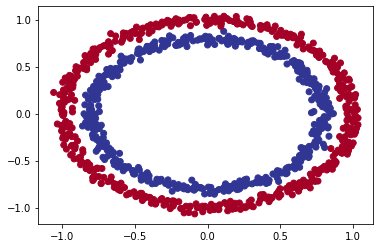

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu);

## Steps in modelling with TensorFlow 

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...


In [6]:
import tensorflow as tf
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3.Fit the data
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 4ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 4.0784 - accuracy: 0.4240


In [7]:
import tensorflow as tf
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(10)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3.Fit the data
model_2.fit(X, y, epochs=100, verbose=0)

In [8]:
# 4. Evaluate the model.
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.0000e+00


[0.6931478381156921, 0.0]

## Improving our model

In [9]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3.Fit the data
model_3.fit(X, y, epochs=200, verbose=0)

In [10]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932550668716431, 0.5]

## The missing piece: Non=linearity


In [11]:
# Create the model
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X,y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9620 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8984 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8595 - accuracy: 0.4110
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8580 - accuracy: 0.4110
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8575 - accuracy: 0.4110
Epoch 11/100
32/32 [=

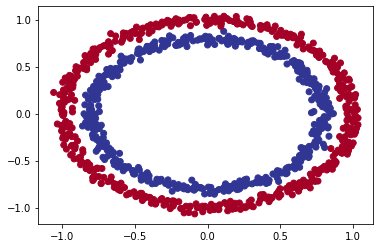

In [12]:
# Check out our Data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [13]:

import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
     

Let's try our first neural netowrk with a non-linear activation funnction.

In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation.
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="relu"),
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X,y, epochs=100)


Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9620 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8984 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8595 - accuracy: 0.4110
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8580 - accuracy: 0.4110
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8575 - accuracy: 0.4110
Epoch 11/

In [15]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation.
model_6 = tf.keras.Sequential([
        tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
model_6.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


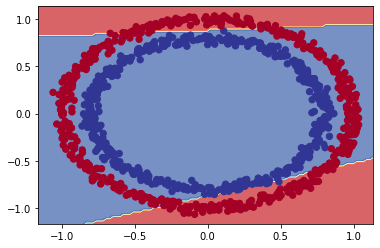

In [16]:
plot_decision_boundary(model_6,X,y)

In [17]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation.
model_7 = tf.keras.Sequential([
        tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [18]:
#4. Evaluate our model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.9910


[0.29480040073394775, 0.9909999966621399]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


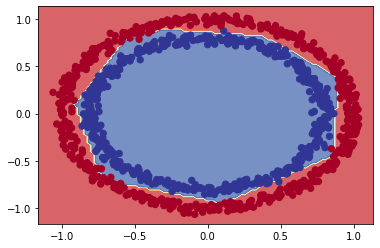

In [19]:
# Let's visualize our metrics
plot_decision_boundary(model_7, X,y)

In [20]:
# Split into train and test sets
X_train, y_train= X[:800],y[:800]
X_test, y_test = X[800:],y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((800, 2), (800,), (200, 2), (200,))

In [21]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [22]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468848377466202, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


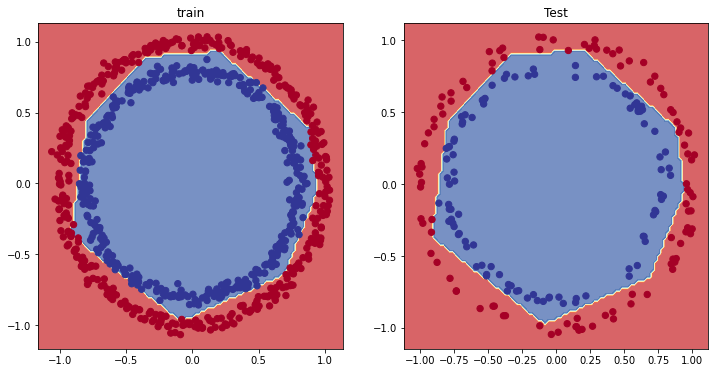

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

## Plot the loss curves

In [24]:
# Convert hte history objetct into a Dataframe
history_df = pd.DataFrame(history.history)

Text(0.5, 1.0, 'Model_8 training Curves')

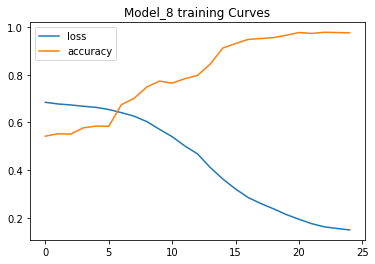

In [25]:
# Plot the loss curves
history_df.plot()
plt.title('Model_8 training Curves')

## Finding the best learning rate

In [26]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid'),
])

# Compile the model
model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

# Fit the model
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

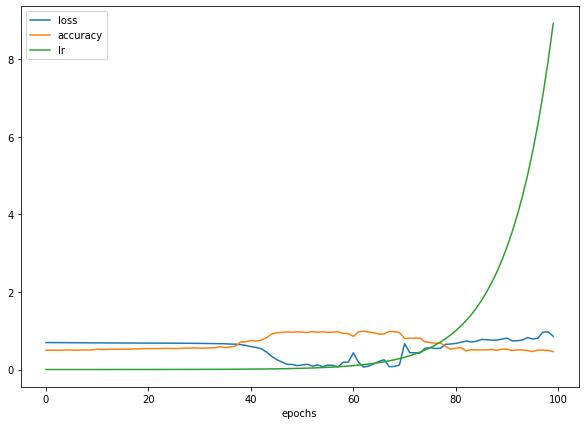

In [27]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

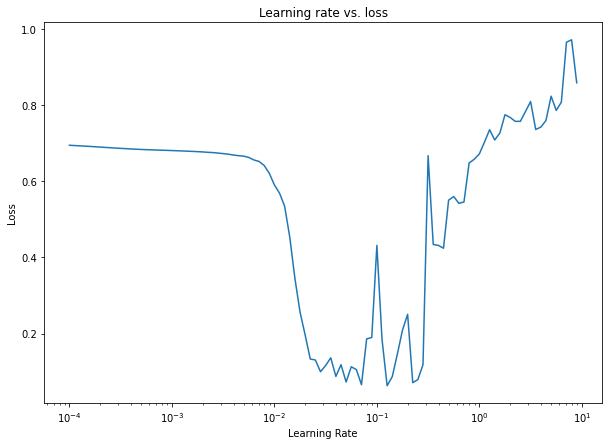

In [28]:

# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [29]:

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [===========

In [30]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)


7/7 [==============================] - 0s 4ms/step - loss: 0.0574 - accuracy: 0.9900


[0.0574018768966198, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


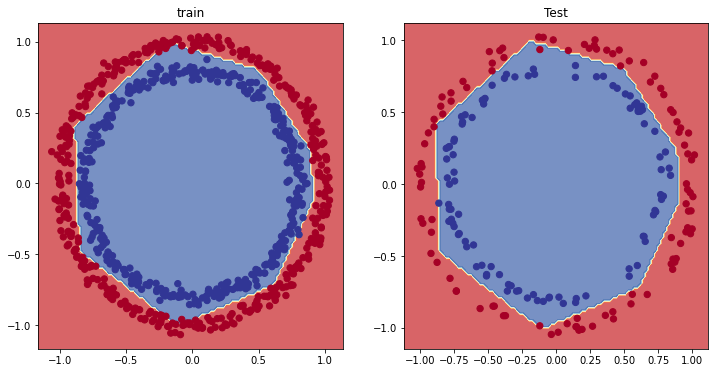

In [31]:
# Plot the decision boundarias
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

In [32]:
# Check the accuracy of our model
loss, accuracy= model_10.evaluate(X_test, y_test)
print(f"Mdel loss on the test set: {loss} ")
print(f"Mdel acuracy on the test set: {(accuracy*100):.2f} %") 

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Mdel loss on the test set: 0.0574018768966198 
Mdel acuracy on the test set: 99.00 %


# Putting all together in a larger  Example. (multiclass classification).

In [33]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [34]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [35]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

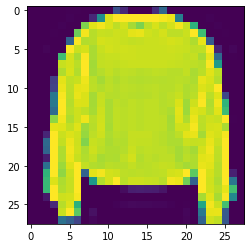

In [36]:

# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);
     

In [37]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

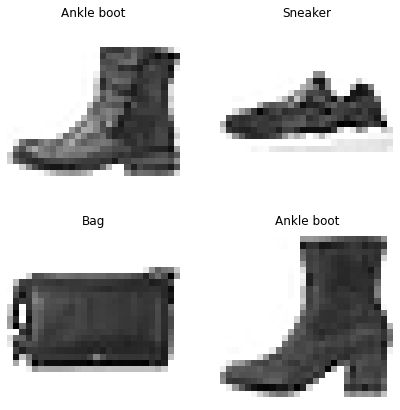

In [38]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

* Input shape= 28x28 (shape of the image)
* Output shape= 10 (one per class of clothing)
* Loss fuction = tf.keras.losses.CategoricalCrosstentropy()
* Output layer activation = Softmax (not sigmoid)


In [39]:
import tensorflow as tf
from scipy.optimize import optimize
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
    ])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels, 
                                epochs=10, 
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.1627 - accuracy: 0.1629 - val_loss: 1.7874 - val_accuracy: 0.2104
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7033 - accuracy: 0.2535 - val_loss: 1.6427 - val_accuracy: 0.2812
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6271 - accuracy: 0.2836 - val_loss: 1.6482 - val_accuracy: 0.2998
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6038 - accuracy: 0.2894 - val_loss: 1.5994 - val_accuracy: 0.2955
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5967 - accuracy: 0.2955 - val_loss: 1.5777 - val_accuracy: 0.3137
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5882 - accuracy: 0.3018 - val_loss: 1.5767 - val_accuracy: 0.3054
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5809 - accuracy: 0.3118 - val_loss: 1.5741 - val_accuracy:

In [40]:
# Check the model summary
model_11.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 4)                 3140      
                                                                 
 dense_24 (Dense)            (None, 4)                 20        
                                                                 
 dense_25 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [41]:
import tensorflow as tf
from scipy.optimize import optimize
# Set random seed
tf.random.set_seed(42)

# Normalize the data
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
    ])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                                train_labels, 
                                epochs=10, 
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 99.9192 - val_accuracy: 0.7298
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 108.3327 - val_accuracy: 0.7341
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 102.6736 - val_accuracy: 0.7373
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 132.9137 - val_accuracy: 0.7042
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 150.7092 - val_accuracy: 0.7028
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 126.4341 - val_accuracy: 0.7159
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 118.1338 - 

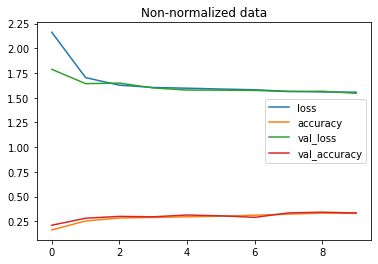

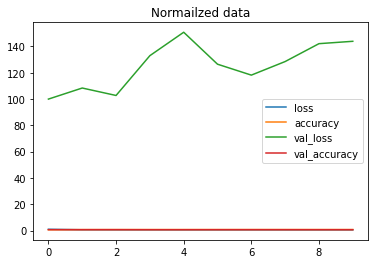

In [42]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot Normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normailzed data")

## Finding the ideal learning rate

In [43]:
# Set rantom seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential ([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_13.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate
lr_sheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 *10**(epoch/20))

# fit the model
find_lr_history = model_13.fit(train_data_norm,
                                              train_labels,
                                              epochs=40,
                                               validation_data = (test_data_norm, test_labels),
                                              callbacks=[lr_scheduler])
    


Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.9126 - accuracy: 0.3121 - val_loss: 1.6130 - val_accuracy: 0.4120 - lr: 1.0000e-04
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3422 - accuracy: 0.5300 - val_loss: 1.1290 - val_accuracy: 0.6441 - lr: 1.1220e-04
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9738 - accuracy: 0.6798 - val_loss: 0.9039 - val_accuracy: 0.6927 - lr: 1.2589e-04
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8289 - accuracy: 0.7134 - val_loss: 0.8146 - val_accuracy: 0.7149 - lr: 1.4125e-04
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7603 - accuracy: 0.7366 - val_loss: 0.7615 - val_accuracy: 0.7367 - lr: 1.5849e-04
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7181 - accuracy: 0.7506 - val_loss: 0.7296 - val_accuracy: 0.7448 - lr: 1.7783e-04
Epoch 7/40
1875/1875 [============

Text(0.5, 1.0, 'Finding the ideal learning rate')

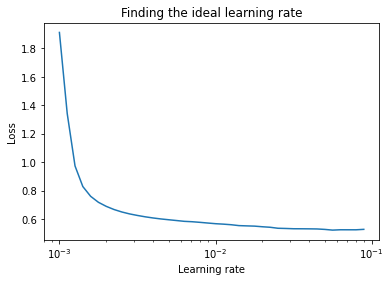

In [44]:
# Plot the larning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 *(10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

In [45]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

# Compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                           train_labels,
                           epochs=20,
                           validation_data = (test_data_norm, test_labels))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [46]:

# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [47]:
# make some predictions with our model
y_probs = model_14.predict(test_data_norm)

y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[8.5629961e-11, 3.5361622e-13, 2.6633725e-05, 4.6356284e-08,
        5.0949748e-05, 9.6119456e-02, 8.1778026e-08, 9.1868833e-02,
        4.0605268e-03, 8.0787349e-01],
       [3.4278653e-06, 1.2899314e-16, 9.5989150e-01, 2.0516393e-07,
        1.5329231e-02, 2.4532665e-13, 2.4142833e-02, 1.1383622e-28,
        6.3272531e-04, 4.4789129e-08],
       [6.1062819e-05, 9.9657661e-01, 4.3866635e-08, 3.3405751e-03,
        1.3249395e-05, 1.4383214e-21, 8.2790129e-06, 7.3236611e-18,
        5.4811181e-08, 4.9224761e-14],
       [7.5031356e-05, 9.9053681e-01, 4.2528447e-07, 9.2231641e-03,
        1.3623103e-04, 1.8276367e-18, 2.6808189e-05, 4.8124370e-14,
        1.4521520e-06, 2.2211375e-11],
       [7.2189979e-02, 1.5495764e-06, 2.5566906e-01, 1.0363132e-02,
        4.3541368e-02, 1.1069343e-13, 6.1693007e-01, 6.7543116e-23,
        1.3049184e-03, 1.2140288e-09]], dtype=float32)

In [48]:
y_preds = y_probs.argmax(axis=1)
y_preds.shape, y_preds[:10]

((10000,), array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]))

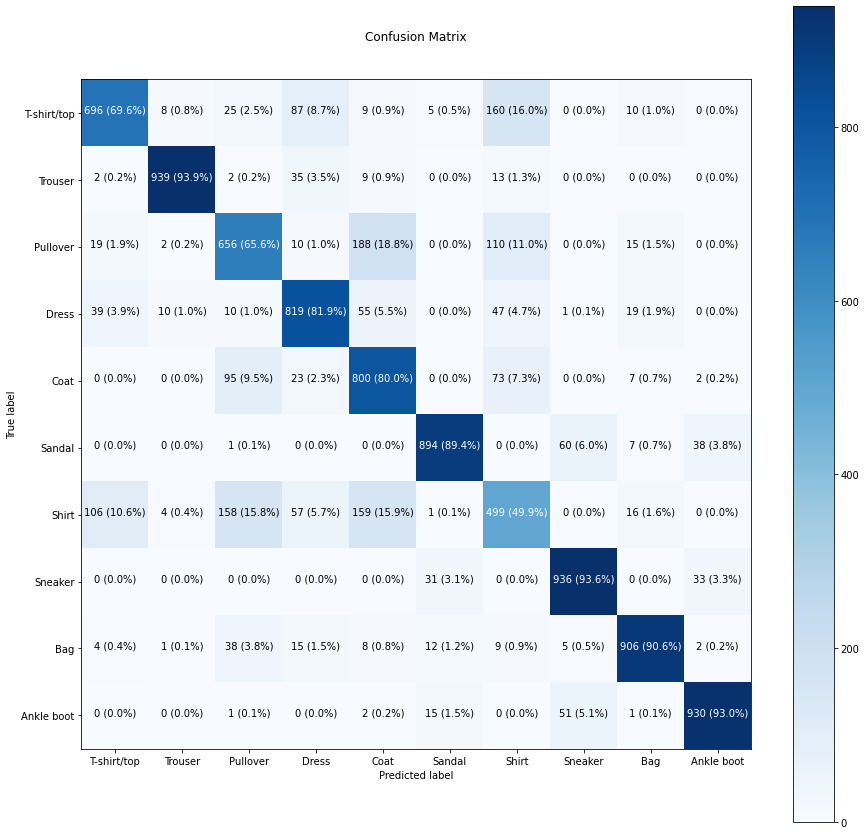

In [49]:
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [50]:

import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 24ms/step


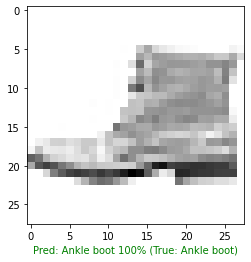

In [54]:

# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)
     